In [13]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation

In [73]:
np.random.seed(0)
def random_walking(discrete_steps, continuous_steps, increment):
    dt = 1 * continuous_steps / discrete_steps
    random_increment = np.random.normal(.0, 1.0 * increment, discrete_steps) * np.sqrt(dt)
    motion = np.cumsum(random_increment)
    motion = np.insert(motion, 0 , 0.0)
    return motion, random_increment

random_walking(50,1,1)

(array([0.        , 0.24947468, 0.30606545, 0.4444799 , 0.76139006,
        1.02550264, 0.88729468, 1.02165747, 1.00025233, 0.98565498,
        1.04372238, 1.06409321, 1.26975855, 1.37738553, 1.39459298,
        1.45736472, 1.5045534 , 1.71584808, 1.68683432, 1.73110878,
        1.61032141, 1.24927412, 1.34170975, 1.46395949, 1.35900151,
        1.67999328, 1.47431492, 1.48078615, 1.45431436, 1.67108207,
        1.87888078, 1.90079366, 1.95427391, 1.82872205, 1.54859513,
        1.49939292, 1.521504  , 1.69549338, 1.86553557, 1.81075928,
        1.76800722, 1.61971944, 1.41889857, 1.17759553, 1.45347683,
        1.38140113, 1.31944807, 1.14227605, 1.25222979, 1.02399017,
        0.99390415]),
 array([ 0.24947468,  0.05659078,  0.13841445,  0.31691016,  0.26411258,
        -0.13820796,  0.13436279, -0.02140514, -0.01459735,  0.0580674 ,
         0.02037084,  0.20566533,  0.10762699,  0.01720745,  0.06277174,
         0.04718868,  0.21129469, -0.02901376,  0.04427446, -0.12078738,
      

MovieWriter imagemagick unavailable; using Pillow instead.


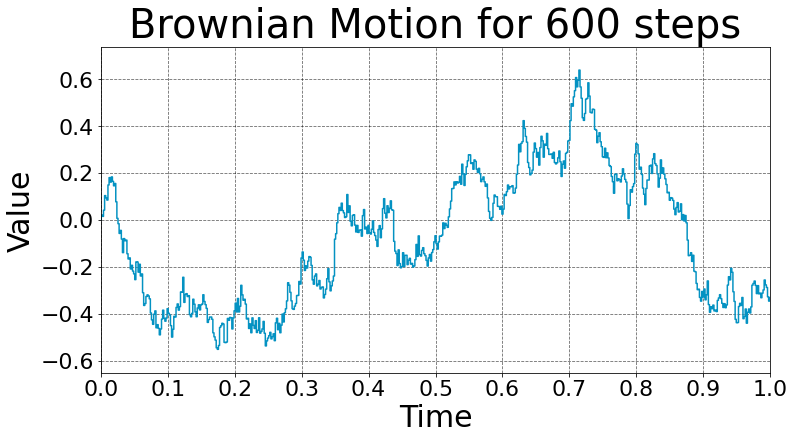

In [29]:
figure = plt.figure(figsize=(12,6))
ax = plt.axes(xlim=(0,1))
line, = ax.step([], [], where='mid', color='#0492C2')

# formatting options
ax.set_xticks(np.linspace(0,1,11))
ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel('Value', fontsize=30)
ax.tick_params(labelsize=22)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)

# initialization function
def init():
    line.set_data([], [])
    return line,

def animate(i):
    np.random.seed(42)
    y, epsilon = random_walking((i + 1) * 10, 1 ,1)
    tr = np.linspace(0.0, 1, (i + 1) * 10 + 1)
    ax.set_title('Brownian Motion for {} steps'.format((i + 1) * 10), fontsize=40)
    ax.set_ylim((np.min(y) - 0.1, np.max(y) + 0.1))

    line.set_data(list(tr), list(y))
    return line,

# call the animator
anim = FuncAnimation(figure, animate, init_func=init, frames=60, interval=100, blit=True)
anim.save('brownian_motion.gif',writer='imagemagick')

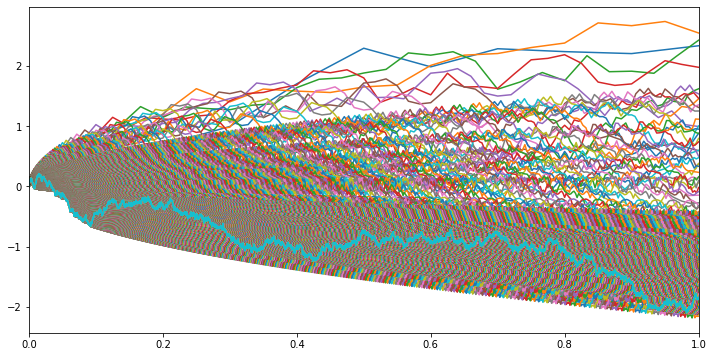

In [32]:
figure = plt.figure(figsize=(12,6))
ax = plt.axes(xlim=(0,1))
for i in range(1000):
    np.random.seed(0)
    y, epsilon = random_walking((i+1)*10, 1, 1)
    tr = np.linspace(0.0, 1, (i + 1) * 10 + 1)
    ax.plot(tr,y)



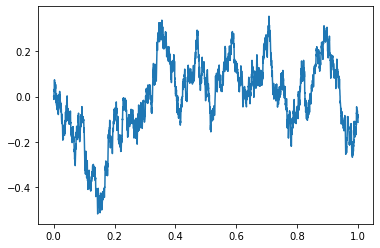

In [78]:
base_cost = 200
i = 365
y, epsilon = random_walking((i + 1) * 10, 1 ,1)
tr = np.linspace(0.0, 1, (i + 1) * 10 + 1)
plt.plot(tr, y)

200
199.45586660069685
200.2801544809185
197.7556539776842
196.0637820910736
202.20440421033115
207.0091757468543
213.01418295491467
224.49451094683806
239.42008372319913
257.0471701857989
271.66501245318346
281.37715661653584
291.6850296226532
300.13707008377116
308.7394719943603
318.63796126377287
325.2911124102295
334.73992185218214
354.7467336492087
370.0307609754809
383.1013478161004
396.31946864699415
417.4647577106679
431.55163095478116
438.51579846212843
429.9091777028126
418.34218362591207
411.78960366830887
412.59029352180175
415.8282950682459
414.96107284714213
418.9414151250002
424.37482054103003
416.40552137088577
400.13293594176827
394.49572912606163
391.03898034488066
378.72629708070593
371.93433606948935
371.7897599974687
368.9717405992741
370.186227707109
348.5190754682004
333.72873325704296
326.0486459208953
312.48380724647524
300.94034335253264
288.141362947905
275.3983921848886
261.2848370844093
242.14051256208924
231.9651552758391
221.02757800019646
210.98844704985

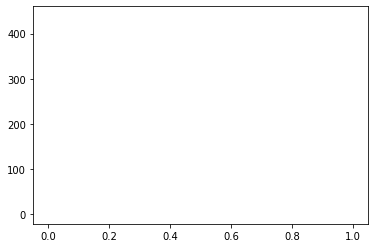

In [79]:
base_cost = 200
for _ in zip(tr[1:],y[1:]):
    print(base_cost)
    base_cost *= (1 + _[1])
    plt.plot(_[0],base_cost)

array([ 0.        ,  0.00768537,  0.01505499, ..., -0.24242337,
       -0.21860962, -0.18435456])